In [2]:
%matplotlib notebook

# Plots and interfaces

In this section, we review the visual aids provided by $LiMe$ measurements, as well as, some tips on how to adjust them to your workflow. If you have any issues with visualizing your data with $LiMe$, please contact the author or [open an issue](https://github.com/Vital-Fernandez/lime/issues).

## Jupyter notebooks and interactive shells

$LiMe$ functions should work in any IDE (Integrated Developement Environment) including [Jupyter Notebooks](https://jupyter.org/).

However, many of $LiMe$ plotting tools make use of [matplotlib widgets](https://matplotlib.org/stable/gallery/index.html#widgets) to select data or review the data. To take advantange of these features (as well as the default matplotlib [plot tools](https://matplotlib.org/stable/users/explain/interactive.html)) in a notebook, a few extra lines of code may be necessary.

This page has been compiled from a jupyter notebook. You can download it from this [link](https://github.com/Vital-Fernandez/lime/blob/master/docs/source/documentation/plots.ipynb) at the library github, alongside the [tutorials data](https://github.com/Vital-Fernandez/lime/tree/master/examples) to test the best configuration for your work.

Let's start by getting the data from the [third tutorial](https://lime-stable.readthedocs.io/en/latest/tutorials/3_CompleteSpec.html):

In [14]:
# %matplotlib qt # Commented for the tutorial workflow
import numpy as np
from astropy.io import fits
import lime

def import_osiris_fits(file_address, ext=0):

    # Open fits file
    with fits.open(file_address) as hdul:
        data, hdr = hdul[ext].data, hdul[ext].header

    w_min, dw, n_pix = hdr['CRVAL1'],  hdr['CD1_1'], hdr['NAXIS1']
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)

    return wavelength, data, hdr

# State the data location
obsFitsFile = '../sample_data/gp121903_osiris.fits'
bands_df_file = '../sample_data/osiris_bands.txt'
cfgFile = '../sample_data/osiris.toml'

# Load the scientific data
wave, flux, header = import_osiris_fits(obsFitsFile)
mask = lime.load_log(bands_df_file)
obs_cfg = lime.load_cfg(cfgFile)

# Declare spectrum properties
z_obj = obs_cfg['sample_data']['z_array'][2]
norm_flux = obs_cfg['sample_data']['norm_flux']

Now, we are going to define a ``Spectrum`` object and plot it:

<IPython.core.display.Javascript object>


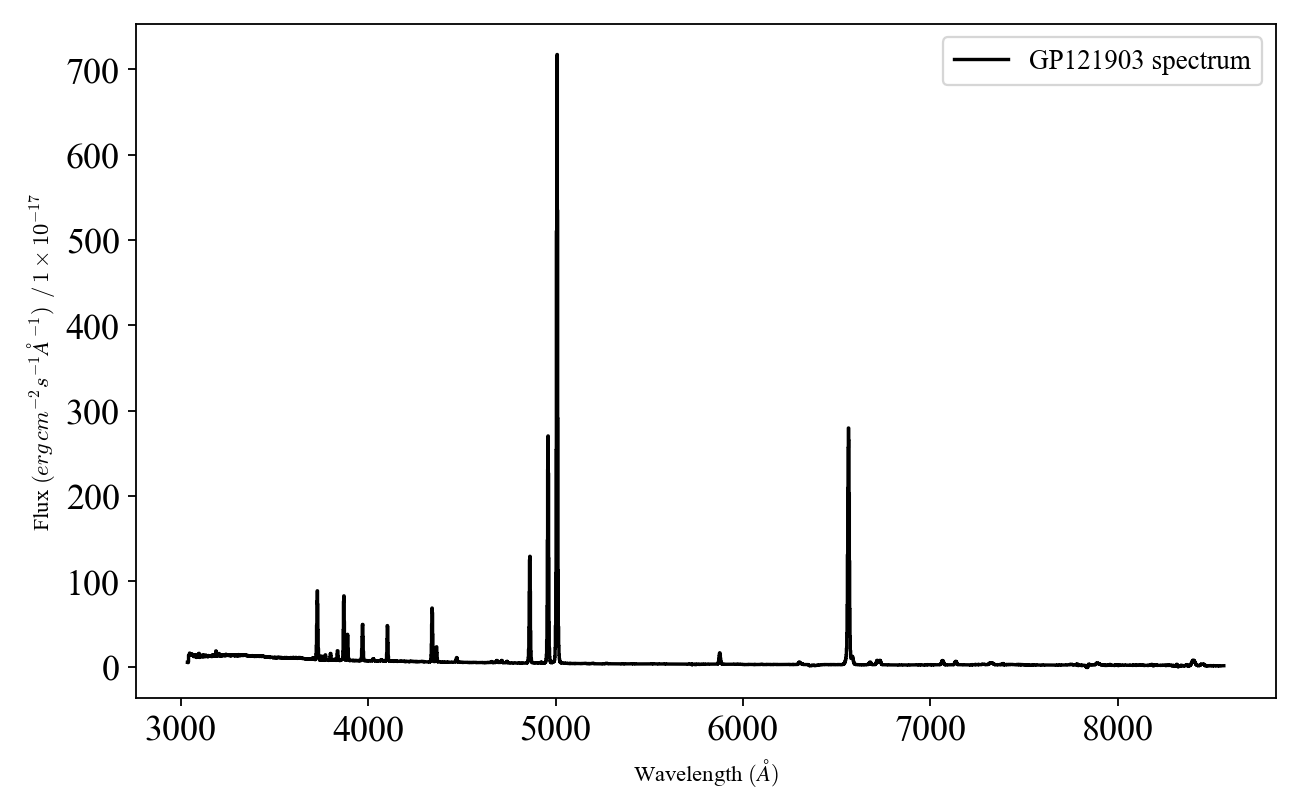

In [11]:
gp_spec = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=norm_flux)
gp_spec.plot.spectrum(label=f'GP121903 spectrum', rest_frame=True)

In the expected behaviour, the notebook has displayed a fixed image of the GP121903 spectrum in the cell above. If your cell is empty, you might need to add the inline [magic command](https://ipython.readthedocs.io/en/stable/interactive/plotting.html#id1) at the beginnig of your cell (and/or the notebook): 

In [12]:
%matplotlib inline

and rerun the previous cell above. The ``inline`` option is fine in most scenarios, where we want to save the plots or a quick look.

However, when you need a closer inspection you can use the ``%matplotlib notebook``, ``%matplotlib widget`` or ``%matplotlib ipympl`` commands. Each one selects a different [backend](https://matplotlib.org/stable/users/explain/backends.html) depending on the user software.


Running the previous code with the ``%matplotlib notebook`` command, we should get an interactive plot:

<IPython.core.display.Javascript object>


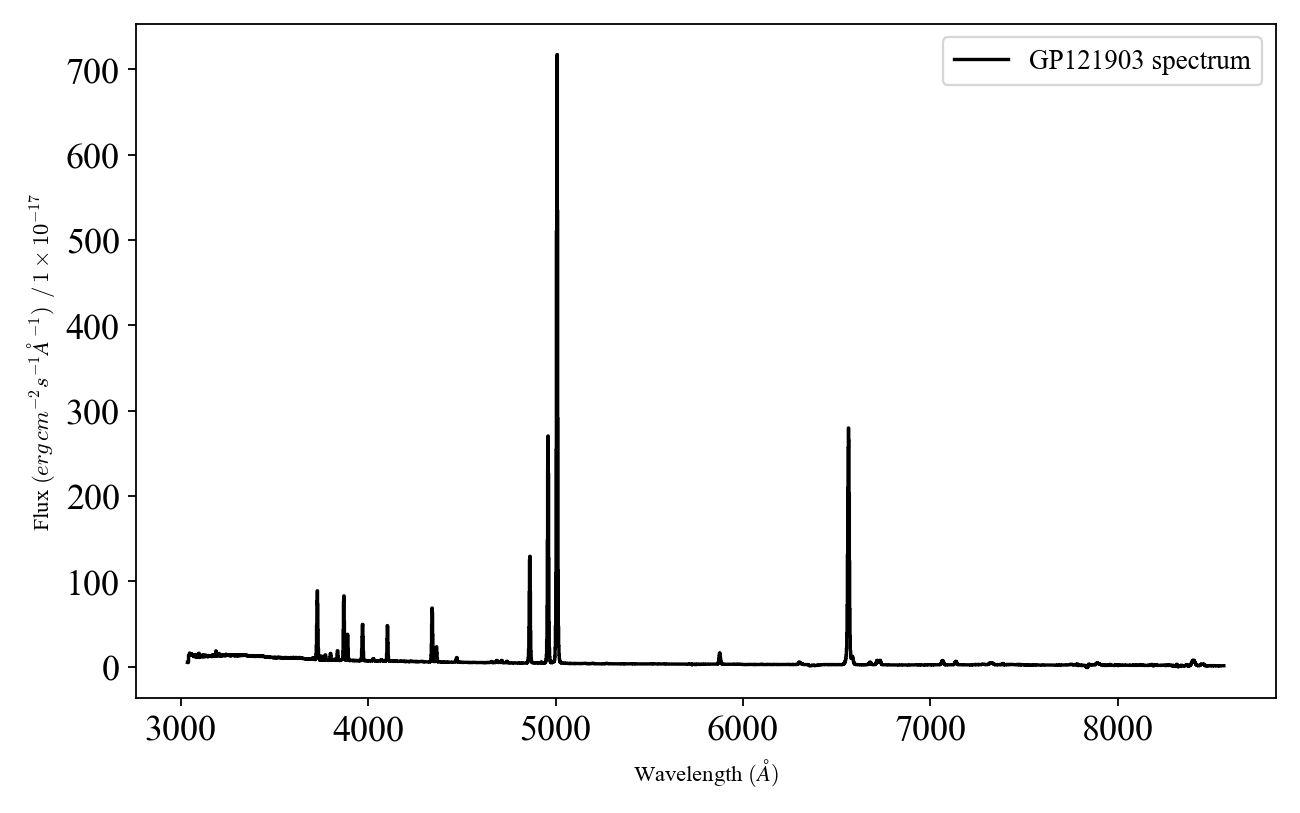

In [13]:
%matplotlib notebook
gp_spec.plot.spectrum(label=f'GP121903 spectrum', rest_frame=True)

Depending on your set-up, alternating between the magic commands may not actully change the display type. In this case, you need to restart the jupyter notebook or interactve shell. **Indeed, it is recommended to use only one display style per notebook, where the magic command is the first line (before any imports).** In the unfair scenario, where you must switch between plot types, you can try to use the [matplotlib.pyplot.switch_backend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.switch_backend.html) command.


The previous magic commands should allow you to use the $LiMe$ interactive plots. However, due to the limited display window of the browser, this can be a challenge.

For example, lets try to use the ``lime.MaskInspector`` class to adjust the lines spectral bands:

<IPython.core.display.Javascript object>


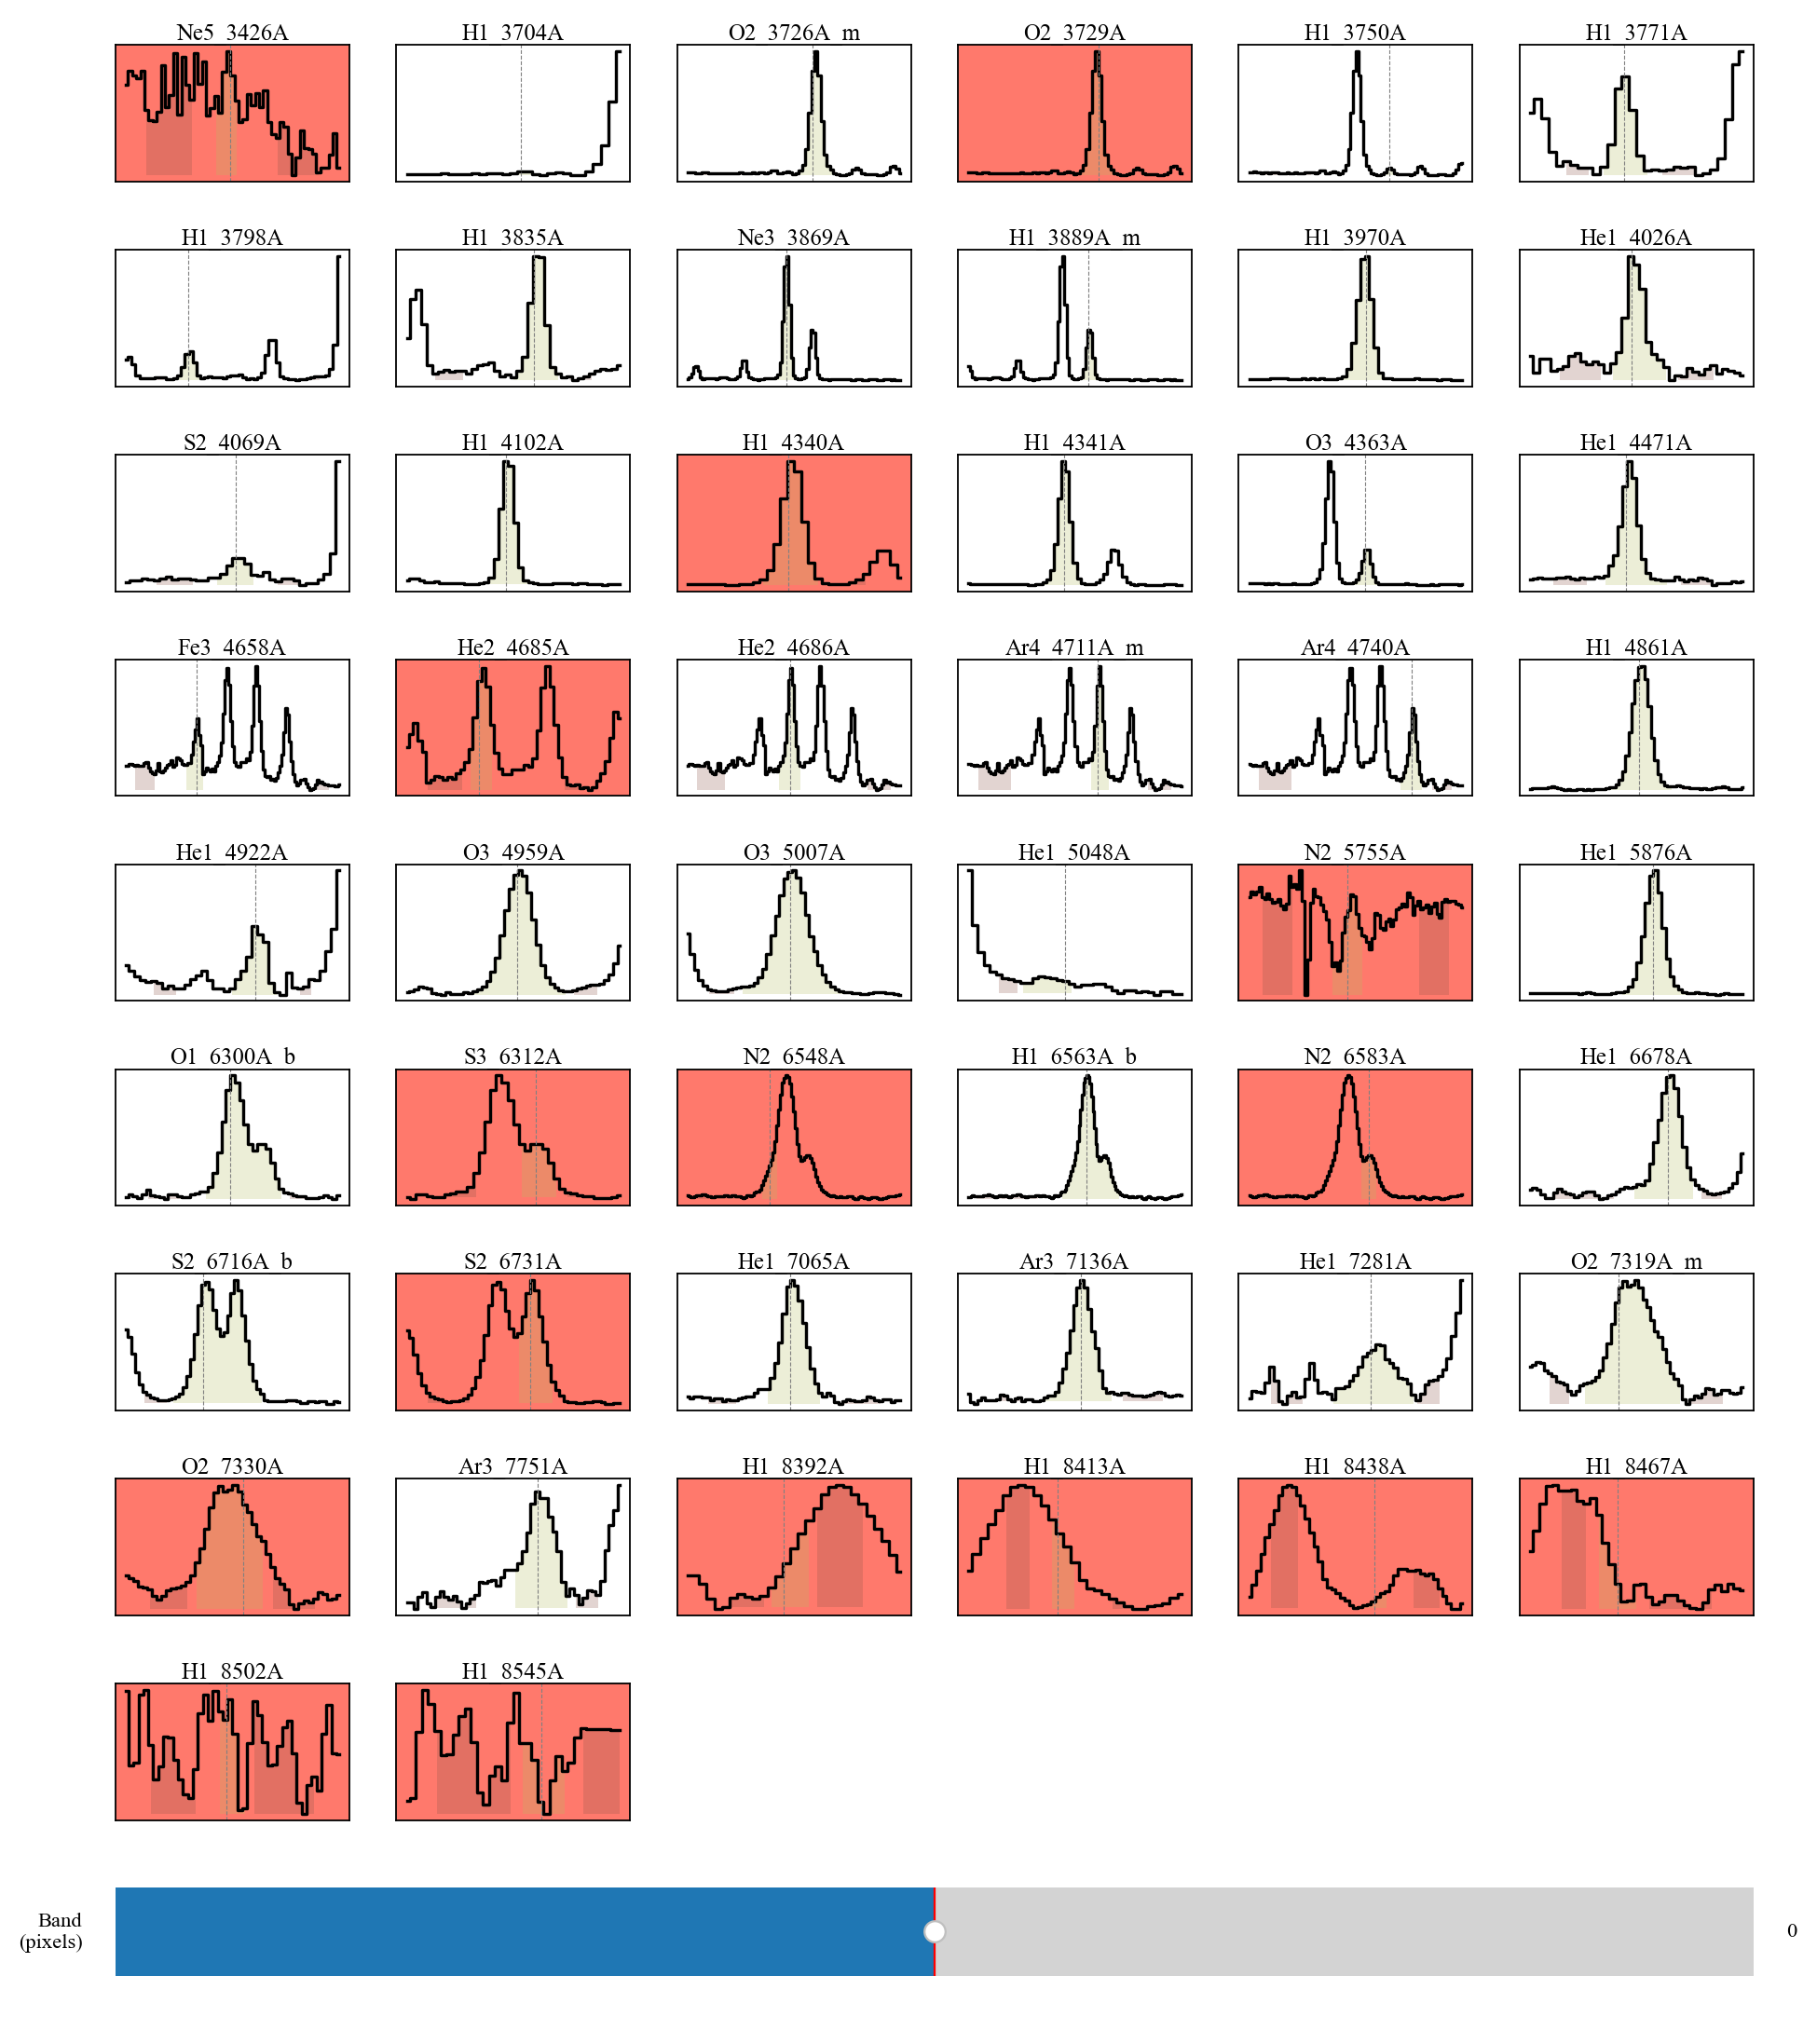

In [15]:
%matplotlib notebook
gp_spec.check.bands(bands_df_file)

You can appreciate that the selection interface is not easy to use nor responsive. 

As an alterntive, *the author recommends using the* ``%matplotlib qt`` [backend](https://matplotlib.org/stable/users/explain/backends.html) for the $\textsc{LiMe}$ interactive plots. This opens a new plotting window in your desktop (check whether it is minimized). This should provide the best user experience:

<IPython.core.display.Javascript object>


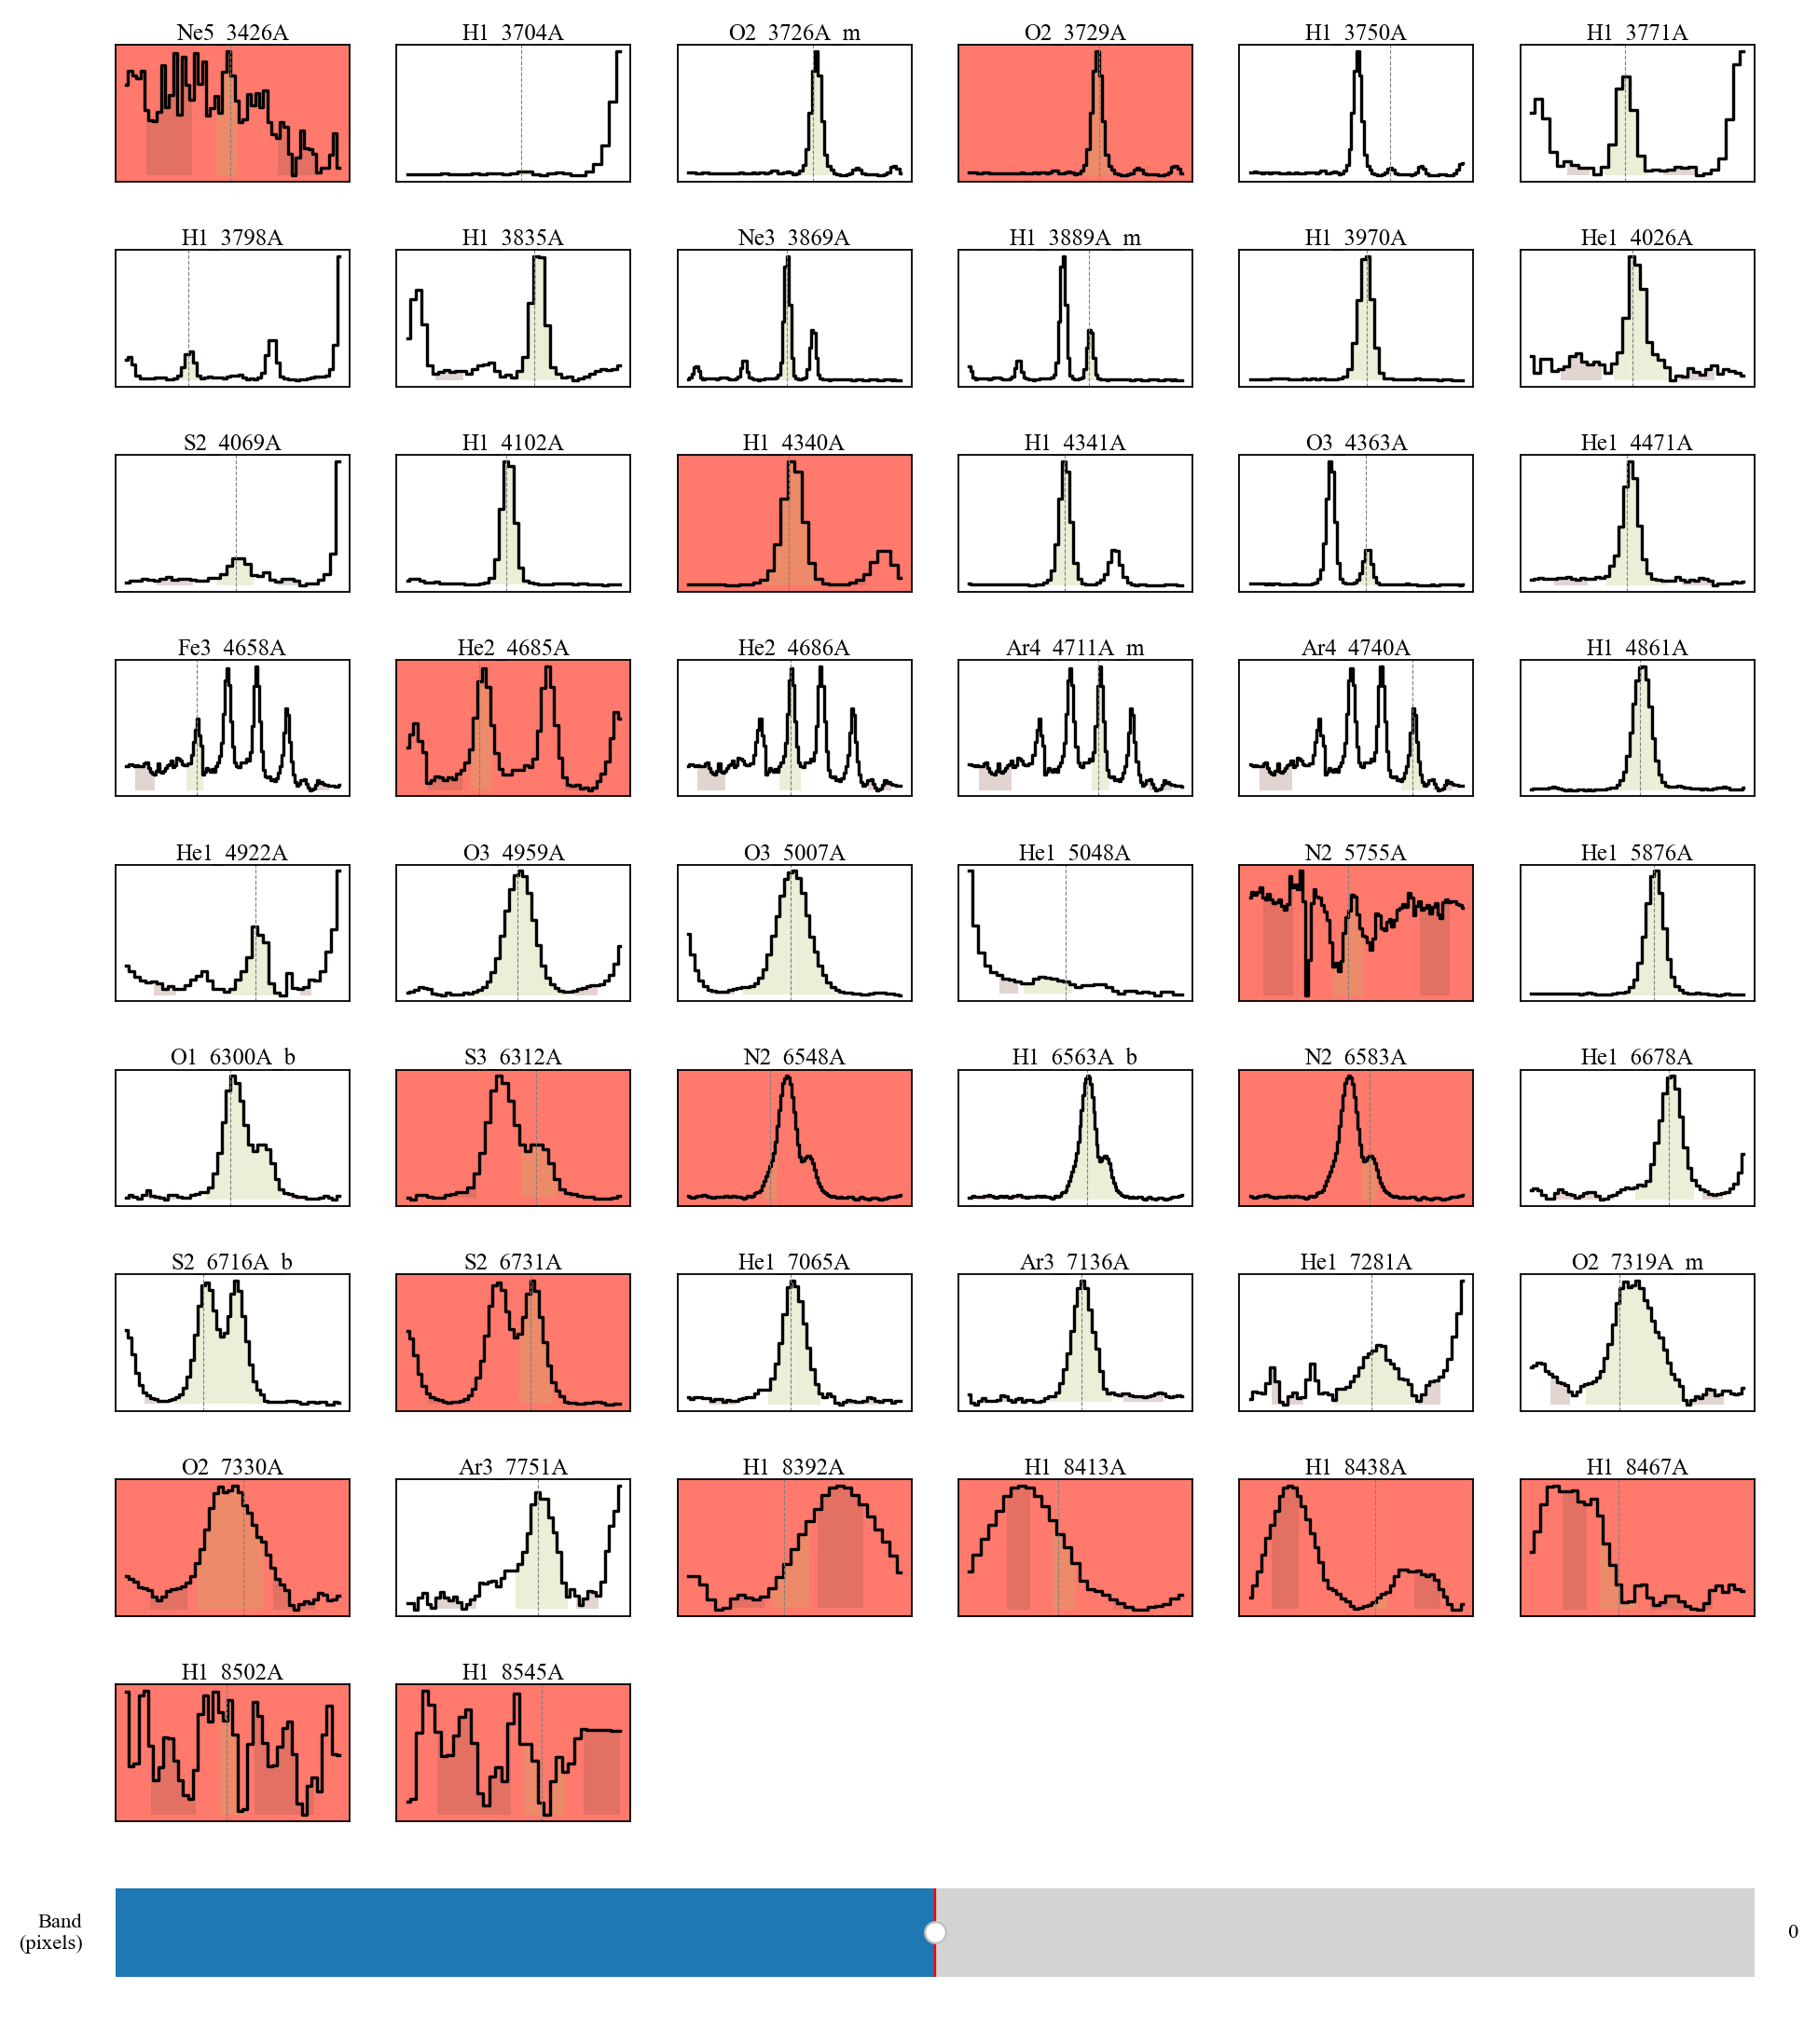

In [16]:
%matplotlib qt 
# Restart the kernel if the backend cannot be changed at this point
gp_spec.check.bands(bands_df_file)

This backend makes use of [PyQt](https://riverbankcomputing.com/software/pyqt/intro) or [Qt for Python](https://doc.qt.io/qtforpython/). Either should be already available in your python installation.